---

## Import Libraries and source Data

---

In [54]:
# library(ggplot2)
# library(tidyr)
# library(dplyr)
# library(caret)
# library(corrplot)
# library(readr)
# library(knitr)
# library(kableExtra)
# library(formattable)
# library(tm)
# library(wordcloud)
# library(gridExtra)
# library(grid)
# library(leaflet)
# library(randomForest)
# options(knitr.table.format = "html") 

In [55]:
df <- read_csv("simpsons_script_lines.csv")

Parsed with column specification:
cols(
  id = col_integer(),
  episode_id = col_integer(),
  number = col_integer(),
  raw_text = col_character(),
  timestamp_in_ms = col_integer(),
  speaking_line = col_character(),
  character_id = col_integer(),
  location_id = col_integer(),
  raw_character_text = col_character(),
  raw_location_text = col_character(),
  spoken_words = col_character(),
  normalized_text = col_character(),
  word_count = col_character()
)
Warning message in rbind(names(probs), probs_f):
"number of columns of result is not a multiple of vector length (arg 1)"Warning message:
"2351 parsing failures.
row # A tibble: 5 x 5 col     row col          expected           actual     file                        expected   <int> <chr>        <chr>              <chr>      <chr>                       actual 1   587 spoken_words delimiter or quote " "        'simpsons_script_lines.csv' file 2   587 spoken_words delimiter or quote B          'simpsons_script_lines.csv' row 3   587

---

## Dataframe Exploration

---

What does our dataframe look like?

In [56]:
head(df, n=3)

id   episode_id number
1 9549 32         209   
2 9550 32         210   
3 9551 32         211   
  raw_text                                                                                                                                                                  
1 Miss Hoover: No, actually, it was a little of both. Sometimes when a disease is in all the magazines and all the news shows, it's only natural that you think you have it.
2 Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?                                                                                                                         
3 Miss Hoover: I don't know. Although I'd sure like to talk to him. He didn't touch my lesson plan. What did he teach you?                                                  
  timestamp_in_ms speaking_line character_id location_id raw_character_text
1 848000          true          464          3           Miss Hoover       
2 856000          true            9          3           Lisa Simpson      
3 856000          true          464          3           Miss Hoover       
  raw_location_text            
1 Springfield Elementary School
2 Springfield Elementary School
3 Springfield Elementary School
  spoken_words                                                                                                                                                 
1 No, actually, it was a little of both. Sometimes when a disease is in all the magazines and all the news shows, it's only natural that you think you have it.
2 Where's Mr. Bergstrom?                                                                                                                                       
3 I don't know. Although I'd sure like to talk to him. He didn't touch my lesson plan. What did he teach you?                                                  
  normalized_text                                                                                                                                        
1 no actually it was a little of both sometimes when a disease is in all the magazines and all the news shows its only natural that you think you have it
2 wheres mr bergstrom                                                                                                                                    
3 i dont know although id sure like to talk to him he didnt touch my lesson plan what did he teach you                                                   
  word_count
1 31        
2 3         
3 22

How big is it?

In [57]:
paste('Rows:',as.character(dim(df)[1]))
paste('Cols:',as.character(dim(df)[2]))

[1] "Rows: 157462"

[1] "Cols: 13"

Column types? 

In [58]:
sapply(df, class)

id         episode_id             number           raw_text 
         "integer"          "integer"          "integer"        "character" 
   timestamp_in_ms      speaking_line       character_id        location_id 
         "integer"        "character"          "integer"          "integer" 
raw_character_text  raw_location_text       spoken_words    normalized_text 
       "character"        "character"        "character"        "character" 
        word_count 
       "character"

Let's simplify some column titles

In [59]:
colnames(df)[9] <- "character_name"

And convert word_count to a numeric type

In [60]:
convert <- function(x){
    if(is.na(as.numeric(x))){
        return(NA)
    }else{
        return(as.numeric(x))
    }
}

df$word_count <- sapply(df$word_count,convert)

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[

"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coerci

"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coerci

We may need to do some more work later if we find issues during our analysis, but for now we're done!

---

# Character Line Analysis

---

Lets get a line count for each of the non-null top characters

In [61]:
line_sum <- 

head(
    
    (df %>% 
        filter(character_name != '') %>% 
        group_by(character_name) %>% 
        summarise(n=n()) %>% 
        arrange(desc(n))),
    
n=10)



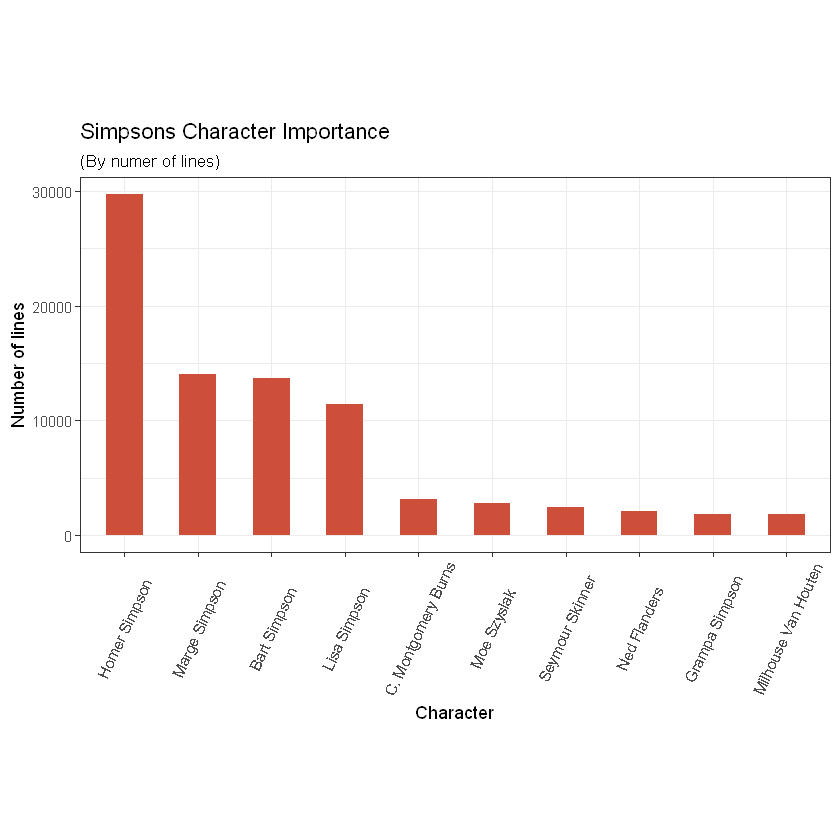

In [62]:
#PLOT

theme_set(theme_bw())

ggplot(data=line_sum, aes(x=reorder(character_name,-n), y=n)) +

    geom_bar(stat="identity", 
             width=.5, 
             fill="tomato3")+

    labs(x="Character", 
         y="Number of lines", 
         title="Simpsons Character Importance",
         subtitle="(By numer of lines)") +

    theme(axis.text.x = element_text(angle=65, vjust=0.5)) +

    theme(aspect.ratio=.5)


We've already seen these results in Gabriela Preda's report,
so instead let's compare line-count with line-length

Our goal is to determine if a character has on average shorter lines, thus affecting their "Importance"

In [63]:
head(
    
    (df %>% 
        filter( character_name != '') %>% 
        group_by(character_name) %>%
        summarise(avg_wordsperline=mean(word_count, na.rm = TRUE )) %>%
        arrange(desc(avg_wordsperline))),
10)

character_name   avg_wordsperline
1  Ebenezer Urkel   3340.0000       
2  Neil Gaiman       670.8889       
3  Ted Nugent        639.7500       
4  Actor             209.8667       
5  Greta Wolfcastle  173.0000       
6  Female Host       109.4000       
7  NRBQ               82.0000       
8  SIR MIX-A-LOT      72.0000       
9  Johnny Bobby       69.0000       
10 Jack Black         64.0000

Wow, looks like we might have some false data skewing the results

(I don't remember Ebenezer Urkel's lines well, but I'm sure I would if they were 3 THOUSAND words long)

Let's check out these long character lines:

In [64]:
df %>% filter(word_count>200)

id     episode_id number
1   21349  72         59   
2   50537 179        188   
3   66298 232        129   
4   66300 232        131   
5   66311 232        142   
6   66313 232        144   
7   69424 242        211   
8   69427 242        214   
9   69430 242        217   
10  69434 242        221   
11  70494 246         25   
12  70497 246         28   
13  71994 251         63   
14  75619 262        248   
15  81133 280        283   
16  81138 280        288   
17  81141 280        291   
18  81148 280        298   
19  92351 320        146   
20  92353 320        148   
21  96297 334        136   
22  96304 334        143   
23  96306 334        145   
24 136529 487         36   
25 136531 487         38   
26 138005 492        172   
27 138021 492        188   
28 139200 496        251   
29 139208 496        259   
30 139216 496        267   
31 140653 502        185   
32 152082 544        166   
   raw_text                                                                                                                                                                                           
1  ("the Lucky Stiff" Funeral Home: ext. "THE LUCKY STIFF" Funeral Home)                                                                                                                              
2  Bart Simpson: (DISAPPOINTED) Oh. Okay.                                                                                                                                                             
3  Disco Stu: Disco Stu's gonna groove up some dough playin' Tic Tac Toe!                                                                                                                             
4  Disco Stu: I can dig it. Hit me with the center square.                                                                                                                                            
5  Homer Simpson: (HURT) Flavor of the month? Me?                                                                                                                                                     
6  Homer Simpson: I 'unno... (GUESSING) Because you weren't cute anymore?                                                                                                                             
7  ("IT NEVER ENDS" SET: Int. "It never ends" set - CONTINUOUS)                                                                                                                                       
8  Actor: And another thing -- You have to stop calling me that.                                                                                                                                      
9  Moe Szyslak: (EXCITED) Really? You mean it?                                                                                                                                                        
10 Homer Simpson: (DROPS CAN AND WALKS AWAY) Whatever.                                                                                                                                                
11 ("eye Caramba" Examination Room: int. "eye caramba" examination room - continuous)                                                                                                                 
12 Homer Simpson: (CONFUSED WAKING-UP SOUND) Sorry.                                                                                                                                                   
13 Bart Simpson: How did you write all these books?                                                                                                                                                   
14 ("MAD" BUILDING: int. "MAD" building - high floor - continuous)                                                                                                                                    
15 ("UNDERCOVER NERD" SOUNDSTAGE: Ext. "undercover nerd" soundstage - continuous)             

Ah, these rogue data points explain the high average's for Ebenezer Urkel, Neil Gaiman, Ted Nugent and others, especially since their averages are being take over so few lines.

I see a patern: all rows say "true" under normalized_text.   Let's see if my speculation is correct:

In [65]:
df %>% filter(normalized_text=='true')

id     episode_id number
1   21349   72         59   
2   21353   72         63   
3   23210   78        239   
4   23212   78        241   
5   50532  179        183   
6   50537  179        188   
7   66294  232        125   
8   66298  232        129   
9   66300  232        131   
10  66311  232        142   
11  66313  232        144   
12  66316  232        147   
13  69424  242        211   
14  69427  242        214   
15  69430  242        217   
16  69434  242        221   
17  69436  242        223   
18  70494  246         25   
19  70497  246         28   
20  70499  246         30   
21  70518  246         49   
22  70521  246         52   
23  71992  251         61   
24  71994  251         63   
25  75312  261        238   
26  75315  261        241   
27  75619  262        248   
28  81133  280        283   
29  81138  280        288   
30  81141  280        291   
... ...    ...        ...   
35   92362 320        157   
36   95555 331        273   
37   96297 334        136   
38   96304 334        143   
39   96306 334        145   
40  117800 414        210   
41  125797 446        135   
42  130215 463        154   
43  136529 487         36   
44  136531 487         38   
45  136533 487         40   
46  138000 492        167   
47  138005 492        172   
48  138021 492        188   
49  138026 492        193   
50  139103 496        154   
51  139096 496        147   
52  139102 496        153   
53  139106 496        157   
54  139197 496        248   
55  139200 496        251   
56  139202 496        253   
57  139205 496        256   
58  139208 496        259   
59  139212 496        263   
60  139216 496        267   
61  140653 502        185   
62  152082 544        166   
63  152283 545        119   
64    5617  19        190   
    raw_text                                                                                                                                                                                           
1   ("the Lucky Stiff" Funeral Home: ext. "THE LUCKY STIFF" Funeral Home)                                                                                                                              
2   Patty Bouvier: I'll keep this short. Gladys lived alone. Died alone. I guess you could say she was a role model for Selma and me. She wasn't a rich woman... but she was rich in spirit.           
3   Homer Simpson: True.                                                                                                                                                                               
4   Homer Simpson: True.                                                                                                                                                                               
5   ("MAD" RECEPTION AREA: Int. "Mad" reception area - continuous)                                                                                                                                     
6   Bart Simpson: (DISAPPOINTED) Oh. Okay.                                                                                                                                                             
7   ("SPRINGFIELD SQUARES" GAMESHOW SET: int. "springfield squares" gameshow set - the next day)                                                                                                       
8   Disco Stu: Disco Stu's gonna groove up some dough playin' Tic Tac Toe!                                                                                                                             
9   Disco Stu: I can dig it. Hit me with the center square.                                                                                                                                            
10  Homer Simpson: (HURT) Flavor of the month? Me?                                                                                                                                                     
11  Ho

Yep, all false data.  If we dump them all, how much damage are we doing?

In [66]:
x <- dim(df %>% filter(normalized_text=='true'))[1]

print(paste("Rows:",as.character(x)))

y <- round((100*(x/157462)),2)

print(paste("Percentage of df:",as.character(y),"%"))


[1] "Rows: 64"
[1] "Percentage of df: 0.04 %"


*Laaaaaaater*

![title](https://assets-cdn.github.com/images/icons/emoji/unicode/270c.png)

In [67]:
df <- df %>% filter(normalized_text !='true')

In [73]:
head(df %>% arrange(desc(word_count)),10)

id     episode_id number
1   22701  76        226   
2  134211 478        124   
3    3069  10        293   
4   52015 184        287   
5   99981 347        261   
6  156167 560        237   
7   27895  94        229   
8   28412  96        199   
9  135363 482        253   
10  15882  52        325   
   raw_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1  Grampa Simpson: One trick is to tell them stories that don't go anywhere... Like the time I caught the ferry over to Shelbyville. I needed a new heel for my shoe, so I decided to go to Morganville, which is what they called Shelbyville in those days. So I tied an onion to my belt, which was the style at the time... now to take the ferry cost a nickel, and in those days nickels had pictures of bumblebees on them. "Give me five bees for a quarter" you'd say. Now, where were we? Oh yes, the important thing was that I had an onion on my belt, which was the style at the time. They didn't have white onions, because of the war...                                               
2  "Randy Newman": It was not! Who else in here's gonna tip ten dollars? Keith Urban, Helen Mirren? I don't think so. They don't have the common touch, do they? Like me. You've seen that. We've bonded, you're thinking "Wow, he's rich, he's famous, he's got great abs." Personal trainer, you couldn't afford that. I used to be fat. I used to eat junk food. You probably still do. But you're going "Wow, look at him. How much did that suit cost him?" Nothing. I got it for free. That's what happens when you're a celebrity. Helen! Helen! She can't hear me. Helen--Mirren! Who does she think she is? Fur coat, no knickers. Anyway, mate, your ice is dripping.                         
3  Homer Simpson: Quiet! I have something to say to all the sons out there; to all the boys; to all the men; to all of us. It's about women, and how they are not mere objects with curves that make us crazy. No, they are our wives, they are our daughters, our sisters, our grandmas, our aunts, our nieces and nephews -- well, not our nephews -- they are our mothers. And you know something, folks? As ridiculous as it sounds, I would rather feel the sweet breath of my beautiful wife on the back of my neck as I sleep than stuff dollar bills into some stranger's G-string. Am I wrong, or am I right?                                                                                  
4  Homer Simpson: Scully, you're cut. Ehhh, Brooks, Groening, Simon, you're all cut. Castellaneta, gone. Kavner, cut. Cartwright, cut. Smith, sorry, cut. Azaria and Shearer, you're cut. Firestone, you're cut. So is Judge. Namath, you stay. All of those people are cut. Phil, Schultz and Wolf and Silverman. Goldreyer, O'Brien, Dolye, Selman. I don't know what... I don't know what you're doin' here, 'cause you're all cut. Pietila, Clan..., Kuwahaha... There're so many cuts here look, I'll just post 'em up and you just see where your name is. Oooo, look at how many cuts there are there. Ohhh, boy, you're cut. All of you. He's cut, I cut you! You're cut too, Shooshie!         
5  David Silverman: David Silverman here, Supervising director of the Simpsons. And tonight, I'm gonna show you how to draw Bart. (ILLUSTRATES) Now, you start off with a tin can like this, and a little tuna fish can for the bottom part of his head. A little hinge of an ear, a big sausage f

This looks SO much better.  We're ready to look at some averages!

In [78]:
head(
    
    (df %>% 
        filter( character_name != '') %>% 
        group_by(character_name) %>%
        summarise(avg_wordsperline=mean(word_count, na.rm = TRUE )) %>%
        arrange(desc(avg_wordsperline))),
10)

character_name  avg_wordsperline
1  NRBQ            82.00           
2  SIR MIX-A-LOT   72.00           
3  Johnny Bobby    69.00           
4  Jack Black      64.00           
5  David Silverman 61.00           
6  Randy Jackson   59.00           
7  Ellen DeGeneres 58.00           
8  Randy Newman    57.75           
9  SAMMY HAGAR     52.00           
10 TRUONG          52.00

It makes sense that a lot of celebrities would be in this list.  Writer's probably to squeeze the most dialog out of their short cameos

Now back to the *original question*: what does this mean for our main characters?

In [76]:
line_counts <- 

head(
    
    (df %>% 
        filter((character_name != '') & (word_count!= '')) %>% 
        group_by(character_name) %>% 
        summarise(total_words = sum(word_count)) %>% 
        arrange(desc(total_words))),
 
 n=10)

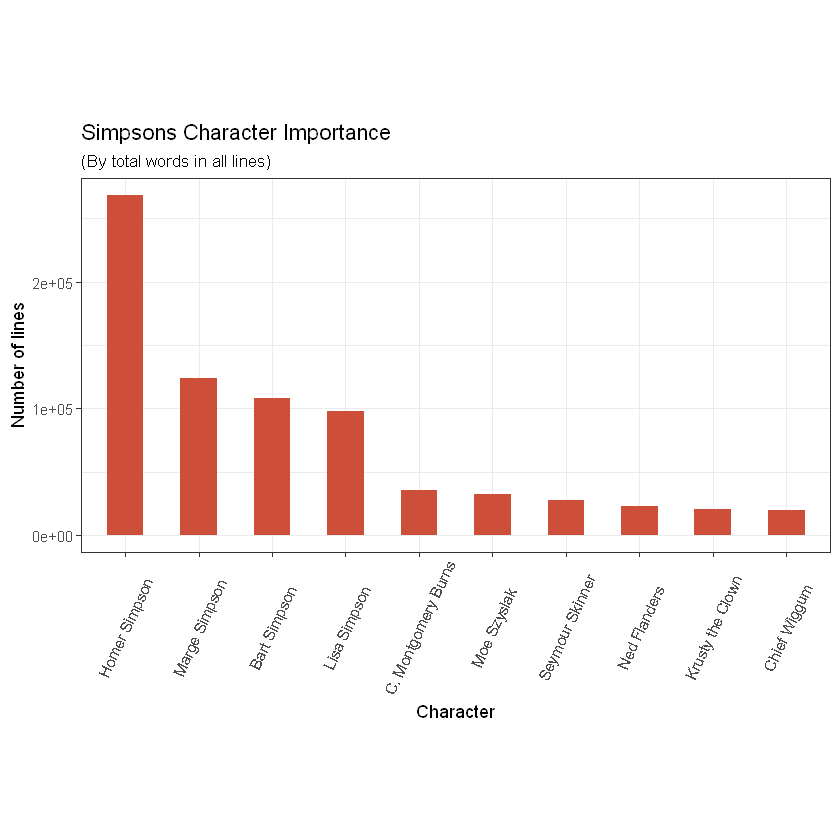

In [77]:
theme_set(theme_bw())

ggplot(data=line_counts, aes(x=reorder(character_name,-total_words), y=total_words)) +

    geom_bar(stat="identity", 
             width=.5, 
             fill="tomato3")+

    labs(x="Character", 
         y="Number of lines", 
         title="Simpsons Character Importance",
         subtitle="(By total words in all lines)") +

    theme(axis.text.x = element_text(angle=65, vjust=0.5)) +

    theme(aspect.ratio=.5)

Doesn't change much for our top 8 characters, however we have an appearance of 2 new characters: *Krusty* and *Chief Wiggum*.  Maybe they have more monologues than the characters they replaced (Grandpa and Millhouse)

In [79]:
df %>% 
    filter( character_name == "Krusty the Clown"| 
           character_name == "Chief Wiggum" | 
           character_name == "Grampa Simpson" | 
           character_name == 'Milhouse Van Houten' ) %>% 
    group_by(character_name) %>%
    summarise(avg_wordsperline=mean(word_count, na.rm = TRUE )) %>%
    arrange(desc(avg_wordsperline))


character_name      avg_wordsperline
1 Krusty the Clown    12.146154       
2 Chief Wiggum        11.162192       
3 Grampa Simpson      10.801111       
4 Milhouse Van Houten  8.285879

We we're right!  Although you would think the longest line in the whole show belonging to Grampa would help is average a little more.

This makes me wonder about Grandpa's distribution.  Maybe it's skewed towards shorter lines.